In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,root_mean_squared_error

In [42]:
df1 = pd.read_csv('datos_regresion.csv')
df2 = pd.read_csv('datos_clasificacion.csv')

In [43]:
df1.head()

,Precio,Categoria,Antiguedad,Valor_Ventas
0,43.708611,Deportes,13,48.645039
1,95.564288,Deportes,15,87.682882
2,75.879455,Hogar,3,55.854498
3,63.879264,Electrónica,8,66.144597
4,24.041678,Deportes,16,21.880369


In [44]:
df1['Categoria'].unique()

array(['Deportes', 'Hogar', 'Electrónica', 'Ropa'], dtype=object)

In [45]:
le = LabelEncoder()
df1['Categoria'] = le.fit_transform(df1['Categoria'])
# Deportes 0, Electrónica 1, Hogar 2, Ropa 3
df1.head()

,Precio,Categoria,Antiguedad,Valor_Ventas
0,43.708611,0,13,48.645039
1,95.564288,0,15,87.682882
2,75.879455,2,3,55.854498
3,63.879264,1,8,66.144597
4,24.041678,0,16,21.880369


In [55]:
df2.head()

,Edad,Ingreso,Historial_Compras,Comprara
0,56,36401.495145,38,1
1,46,57266.123001,35,1
2,32,40574.656334,32,1
3,60,39211.442022,29,0
4,25,18135.390525,36,0


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Precio        200 non-null    float64
 1   Categoria     200 non-null    int64  
 2   Antiguedad    200 non-null    int64  
 3   Valor_Ventas  200 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 6.4 KB


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Edad               200 non-null    int64  
 1   Ingreso            200 non-null    float64
 2   Historial_Compras  200 non-null    int64  
 3   Comprara           200 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


In [48]:
df1.describe()

,Precio,Categoria,Antiguedad,Valor_Ventas
count,200.000000,200.000000,200.00000,200.000000
mean,53.560561,1.450000,10.09500,53.397831
std,26.540229,1.168042,5.59037,27.608267
min,10.496991,0.000000,1.00000,2.098555
25%,30.572417,0.000000,5.00000,29.425939
50%,54.503763,1.000000,10.00000,51.890635
75%,78.117365,3.000000,15.00000,75.139502
max,98.819824,3.000000,19.00000,120.563225


In [49]:
df2.describe()

,Edad,Ingreso,Historial_Compras,Comprara
count,200.000000,200.000000,200.000000,200.000000
mean,41.570000,57296.350105,25.070000,0.480000
std,13.715527,24660.774324,14.225573,0.500854
min,18.000000,15430.234627,0.000000,0.000000
25%,30.000000,35977.630503,12.000000,0.000000
50%,42.000000,59705.488132,25.500000,0.000000
75%,54.000000,76709.115370,36.000000,1.000000
max,64.000000,99154.577259,49.000000,1.000000


In [50]:
df1.isnull().sum()

,0
Precio,0
Categoria,0
Antiguedad,0
Valor_Ventas,0


In [51]:
df2.isnull().sum()

,0
Edad,0
Ingreso,0
Historial_Compras,0
Comprara,0


# Regresion

In [54]:
X1 = df1.drop('Valor_Ventas', axis=1)
y1 = df1['Valor_Ventas']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_1)
X_test_1 = scaler.transform(X_test_1)

modelo = LinearRegression()
modelo.fit(X_train_1, y_train_1)


r2_1 = modelo.score(X_test_1, y_test_1)
mse_1 = mean_squared_error(y_test_1, modelo.predict(X_test_1))
rmse_1 = np.sqrt(mse_1)
mae_1 = mean_absolute_error(y_test_1, modelo.predict(X_test_1))

print("MAE:", mae_1)
print("MSE:", mse_1)
print("RMSE:", rmse_1)
print("R2:", r2_1)

MAE: 8.74169335503014
MSE: 106.78356824393634
RMSE: 10.333613513381287
R2: 0.8462439348956523


# Clasificacion

In [56]:
from sklearn.metrics import (
confusion_matrix,
precision_score,
accuracy_score,
recall_score,
roc_curve,
roc_auc_score,
)
from sklearn.neighbors import KNeighborsClassifier

Matriz de Confusión:
 [[ 6 14]
 [ 8 12]]

Exactitud: 0.45
Precisión: 0.46153846153846156

Sensibilidad (Recall): 0.6
Especificidad: 0.3

AUC: 0.45000000000000007


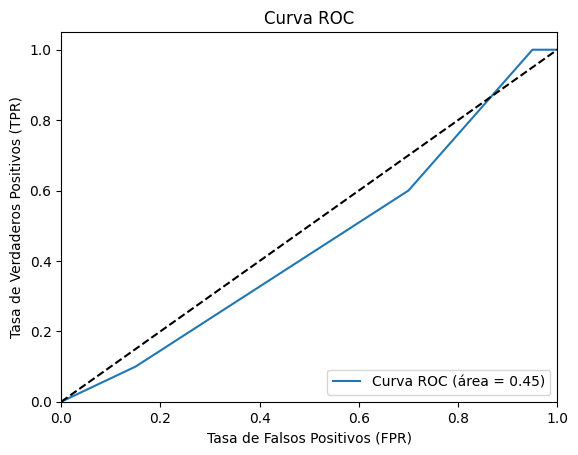

In [59]:
X2 = df2.drop('Comprara', axis=1)
y2 = df2['Comprara']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

n_neighbors = 3 #probar numeros

# Crear el modelo K-NN (por ejemplo, k=3)
modelo = KNeighborsClassifier(n_neighbors=n_neighbors)
# Entrenar el modelo
modelo.fit(X_train_2, y_train_2)
# Predecir con el modelo
y_pred_2 = modelo.predict(X_test_2)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test_2, y_pred_2)
print("Matriz de Confusión:\n", conf_matrix)

# Precisión y Exactitud
accuracy = accuracy_score(y_test_2, y_pred_2)
precision = precision_score(y_test_2, y_pred_2)
print("\nExactitud:", accuracy)
print("Precisión:", precision)

# Sensibilidad y Especificidad
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn) # Recall
specificity = tn / (tn + fp)
print("\nSensibilidad (Recall):", sensitivity)
print("Especificidad:", specificity)

# Curva ROC y AUC
y_prob_2 = modelo.predict_proba(X_test_2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_2, y_prob_2)
auc = roc_auc_score(y_test_2, y_prob_2)
print("\nAUC:", auc)

# Graficar curva ROC
plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--') # Diagonal de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Matriz de Confusión:
 [[13  7]
 [14  6]]

Exactitud: 0.475
Precisión: 0.46153846153846156

Sensibilidad (Recall): 0.3
Especificidad: 0.65

AUC: 0.54875


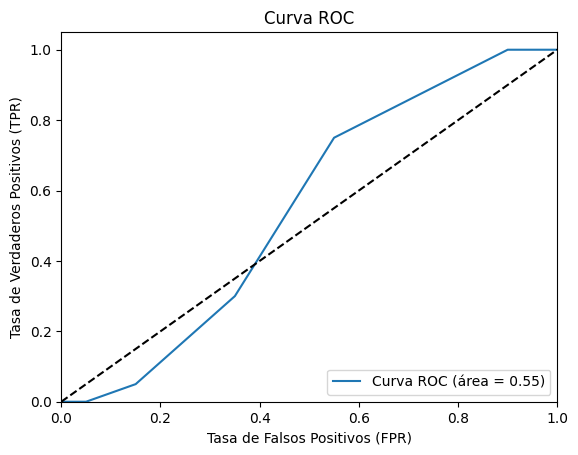

In [62]:
X2 = df2.drop('Comprara', axis=1)
y2 = df2['Comprara']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

n_neighbors = 6 #probar numeros

# Crear el modelo K-NN
modelo = KNeighborsClassifier(n_neighbors=n_neighbors)
# Entrenar el modelo
modelo.fit(X_train_2, y_train_2)
# Predecir con el modelo
y_pred_2 = modelo.predict(X_test_2)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test_2, y_pred_2)
print("Matriz de Confusión:\n", conf_matrix)

# Precisión y Exactitud
accuracy = accuracy_score(y_test_2, y_pred_2)
precision = precision_score(y_test_2, y_pred_2)
print("\nExactitud:", accuracy)
print("Precisión:", precision)

# Sensibilidad y Especificidad
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn) # Recall
specificity = tn / (tn + fp)
print("\nSensibilidad (Recall):", sensitivity)
print("Especificidad:", specificity)

# Curva ROC y AUC
y_prob_2 = modelo.predict_proba(X_test_2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_2, y_prob_2)
auc = roc_auc_score(y_test_2, y_prob_2)
print("\nAUC:", auc)

# Graficar curva ROC
plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--') # Diagonal de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

**Comparación de Métricas de Regresión y Clasificación e Interpretación de Resultados**

**Comparación de Métricas:**

Las métricas de regresión y clasificación se utilizan para evaluar el rendimiento de modelos predictivos, pero difieren fundamentalmente porque miden diferentes tipos de predicciones:

*   **Métricas de Regresión:** Se utilizan para evaluar modelos que predicen un valor continuo.
    *   **MAE (Error Absoluto Medio):** Mide el promedio de las diferencias absolutas entre las predicciones y los valores reales. Es fácil de entender y menos sensible a los valores atípicos que el MSE.
    *   **MSE (Error Cuadrático Medio):** Mide el promedio de los errores al cuadrado entre las predicciones y los valores reales. Penaliza más los errores grandes debido al cuadrado.
    *   **RMSE (Raíz del Error Cuadrático Medio):** Es la raíz cuadrada del MSE. Está en la misma unidad que la variable objetivo, lo que facilita su interpretación. Al igual que el MSE, es sensible a los valores atípicos.
    *   **R² (Coeficiente de Determinación):** Indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor más cercano a 1 indica que el modelo explica una mayor proporción de la varianza.

*   **Métricas de Clasificación:** Se utilizan para evaluar modelos que predicen una etiqueta de clase discreta. Estas métricas a menudo se basan en la matriz de confusión, que resume el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.
    *   **Precisión (Precision):** Mide la proporción de predicciones positivas correctas (TP / (TP + FP)). Es útil cuando el costo de un falso positivo es alto.
    *   **Exactitud (Accuracy):** Mide la proporción total de predicciones correctas ((TP + TN) / Total). Es una métrica general, pero puede ser engañosa en conjuntos de datos desbalanceados.
    *   **Sensibilidad (Recall o Tasa de Verdaderos Positivos):** Mide la proporción de casos positivos reales que fueron identificados correctamente (TP / (TP + FN)). Es útil cuando el costo de un falso negativo es alto.
    *   **Especificidad (Tasa de Verdaderos Negativos):** Mide la proporción de casos negativos reales que fueron identificados correctamente (TN / (TN + FP)).
    *   **Curva ROC y AUC (Área Bajo la Curva ROC):** La Curva ROC visualiza la capacidad del modelo para discriminar entre clases a diferentes umbrales. El AUC es una medida agregada de esta capacidad; un valor más cercano a 1 indica una mejor discriminación.

**¿Qué métricas son más útiles?**

*   **Para Regresión:** MAE, MSE, RMSE y R² son todas útiles, y la elección puede depender del contexto y de lo que se quiera enfatizar (por ejemplo, la penalización de errores grandes). El R² es fundamental para entender cuánto de la variabilidad de la variable objetivo explica el modelo.
*   **Para Clasificación:** La utilidad de las métricas de clasificación depende del problema y del tipo de errores que sean más costosos. La exactitud es una métrica general, pero para problemas con desbalance de clases, la precisión, sensibilidad, especificidad y el AUC suelen ser más informativos. El AUC es una buena métrica general para evaluar la capacidad de discriminación del modelo.

**Interpretación de los Patrones Identificados:**

*   **Modelo de Regresión:**
    *   El modelo de regresión lineal, con un R² de 0.846, muestra un **buen ajuste** a los datos. Esto significa que las variables predictoras (Precio, Categoria, Antiguedad) son capaces de explicar una parte significativa (aproximadamente el 84.6%) de la variación en el 'Valor_Ventas'.
    *   El error promedio en las predicciones, indicado por el MAE de 8.74, sugiere que, en promedio, las predicciones de ventas se desvían en esta cantidad de los valores reales. Considerando el rango de 'Valor_Ventas' (ver `df1.describe()`), un MAE de 8.74 parece razonable para este conjunto de datos.

*   **Modelo de Clasificación:**
    *   El modelo K-NN (con n\_neighbors=3) para la clasificación **no es capaz de distinguir correctamente entre las clases** ('Comprara' 0 o 1) con un rendimiento adecuado.
    *   La baja **Exactitud** (0.45) indica que el modelo solo predice correctamente el 45% de las veces.
    *   La baja **Precisión** (0.46) y **Especificidad** (0.30) junto con una alta tasa de Falsos Positivos (FPR = 0.70) sugieren que el modelo tiene una gran dificultad para identificar correctamente los casos negativos (personas que no van a comprar) y tiende a predecir erróneamente que las personas comprarán.
    *   El **AUC** de 0.45, siendo menor a 0.5, confirma que el modelo actual no es mejor que una clasificación aleatoria.
    *   Aunque la **Sensibilidad** (0.60) es la métrica más alta, todavía significa que se están perdiendo el 40% de los compradores reales (Falsos Negativos = 8).

En conclusión, mientras que el modelo de regresión parece tener un rendimiento aceptable para predecir el valor de las ventas, el modelo de clasificación K-NN actual no es efectivo para predecir si un cliente comprará o no y requiere una mejora significativa o la exploración de otros algoritmos.

**Aplicabilidad de las Métricas**

*   **MAE vs. RMSE para Regresión:**
    *   Tanto el MAE como el RMSE son métricas que miden el error promedio de un modelo de regresión. La principal diferencia radica en cómo penalizan los errores.
    *   El **MAE (Error Absoluto Medio)** mide la magnitud promedio de los errores sin considerar su dirección. Es menos sensible a los valores atípicos (outliers) que el RMSE porque utiliza el valor absoluto de los errores en lugar de cuadrarlos.
    *   El **RMSE (Raíz del Error Cuadrático Medio)**, al cuadrar los errores, les da un peso desproporcionadamente mayor a los errores grandes. Esto significa que el RMSE penaliza más fuertemente las predicciones que están muy lejos del valor real.

    *   **¿Cuándo usar MAE en lugar de RMSE?**
        *   Se recomienda utilizar **MAE** cuando los valores atípicos están presentes en los datos y no se desea que afecten significativamente la evaluación del modelo. El MAE proporciona una medida más robusta del error típico en estos casos.
        *   También es útil cuando se desea que todos los errores, independientemente de su magnitud, contribuyan linealmente a la métrica.

*   **Sensibilidad vs. Especificidad en Clasificación:**
    *   La **Sensibilidad (Recall)** mide la capacidad del modelo para identificar correctamente todos los casos positivos reales (TP / (TP + FN)). Es decir, responde a la pregunta: De todos los casos positivos reales, ¿cuántos identificó correctamente el modelo?
    *   La **Especificidad** mide la capacidad del modelo para identificar correctamente todos los casos negativos reales (TN / (TN + FP)). Responde a la pregunta: De todos los casos negativos reales, ¿cuántos identificó correctamente el modelo?

    *   **¿En qué situaciones es más importante maximizar la Sensibilidad en lugar de la Especificidad?**
        *   Es más importante maximizar la **Sensibilidad** cuando el costo de un **Falso Negativo (FN)** es alto. Un falso negativo ocurre cuando el modelo predice incorrectamente que un caso positivo es negativo.
        *   **Ejemplos:**
            *   **Detección de enfermedades graves:** En el diagnóstico médico, un falso negativo podría significar no detectar una enfermedad grave en un paciente enfermo, lo que podría tener consecuencias fatales. Es preferible tener falsos positivos (personas sanas diagnosticadas como enfermas, que requerirían más pruebas) que falsos negativos.
            *   **Sistemas de seguridad:** En la detección de fraudes o intrusiones, un falso negativo podría significar no detectar una actividad maliciosa, lo que podría resultar en pérdidas significativas. Es preferible tener algunas alertas falsas (falsos positivos) que no detectar una amenaza real.
            *   **Campaña de marketing:** Si el objetivo es identificar a todos los clientes potenciales que probablemente comprarán, un falso negativo significaría perder la oportunidad de vender a un cliente interesado. Es mejor contactar a algunos clientes que no comprarán (falsos positivos) que perder a un cliente que sí lo haría.

En estas situaciones, se prioriza identificar la mayor cantidad posible de casos positivos reales, incluso si esto resulta en un mayor número de falsos positivos.